In [1]:
!pip install fastdtw

You should consider upgrading via the '/Users/technogleb/ts_march_2023/.env/bin/python -m pip install --upgrade pip' command.


In [2]:
from typing import Tuple, List

import numpy as np
import matplotlib.pyplot as plt
import fastdtw
%matplotlib inline

### Пример работы.

In [3]:
# сгенерируем два временных ряда, сдвинутых относительно друг друга

In [4]:
ts_1 = np.array([np.sin(x) for x in range(0, 30)])
ts_2 = np.array([np.sin(x) for x in range(5, 35)])

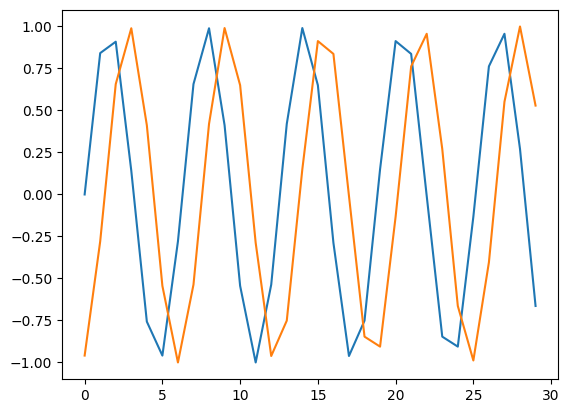

In [5]:
# видим, что обычная евклидова мера в данном случае сработает плохо 
plt.plot(ts_1)
plt.plot(ts_2)

In [6]:
dtw, path = fastdtw.dtw(ts_1, ts_2)

In [7]:
dtw

7.427770990242975

In [8]:
path

[(0, 0),
 (0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (16, 17),
 (17, 18),
 (18, 19),
 (19, 20),
 (20, 21),
 (21, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26),
 (26, 27),
 (27, 28),
 (28, 29),
 (29, 29)]

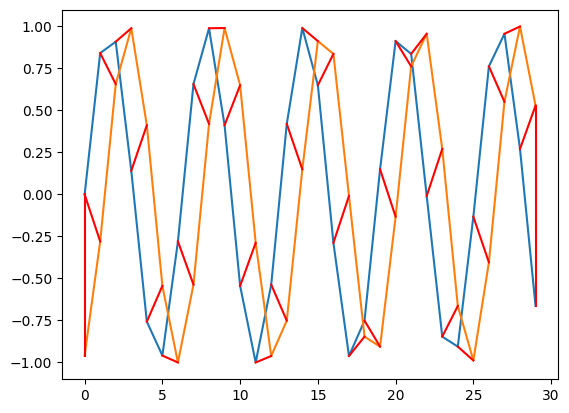

In [9]:
# в то время, как dynamic time warping ставит в соответствие именно те точки, которые нужны
plt.plot(ts_1)
plt.plot(ts_2)
for pair in path:
    plt.plot(pair, [ts_1[pair[0]], ts_2[pair[1]]], 'r-')

## Практика: наивная имплементация DTW.

### Задание 1. Реализуйте матрицу расстояний d_matrix

In [26]:
def make_distance_matrix(ts_1: np.array, ts_2: np.array) -> np.array:
    """
    Должна вернуть матрицу размерности (len(ts_1), len(ts_2)),
    в которой каждый элемент (i, j) равен евклидовому расстоянию от 
    точки ts_1[i] до точки ts_2[j]
    """
    d_matrix = []
    
    for i in ts_1:
        d_matrix.append(np.abs(np.add(ts_2, -i)))
        
    d_matrix = np.vstack(d_matrix)
    return d_matrix

In [15]:
ts_1 - ts_2.reshape(-1, 1)

array([[ 9.58924275e-01,  1.80039526e+00,  1.86822170e+00,
         1.10004428e+00,  2.02121779e-01,  0.00000000e+00,
         6.79508776e-01,  1.61591087e+00,  1.94828252e+00,
         1.37104276e+00,  4.14903164e-01, -4.10659319e-02,
         4.22351357e-01,  1.37909131e+00,  1.94953163e+00,
         1.60921211e+00,  6.71020958e-01, -2.47321722e-03,
         2.07937028e-01,  1.10880148e+00,  1.87186953e+00,
         1.79557991e+00,  9.50072965e-01,  1.12703870e-01,
         5.33459127e-02,  8.26572525e-01,  1.72148273e+00,
         1.91530020e+00,  1.22983006e+00,  2.95290390e-01],
       [ 2.79415498e-01,  1.12088648e+00,  1.18871293e+00,
         4.20535506e-01, -4.77386997e-01, -6.79508776e-01,
         0.00000000e+00,  9.36402097e-01,  1.26877374e+00,
         6.91533983e-01, -2.64605613e-01, -7.20574708e-01,
        -2.57157420e-01,  6.99582535e-01,  1.27002285e+00,
         9.29703338e-01, -8.48781847e-03, -6.81981994e-01,
        -4.71571749e-01,  4.29292708e-01,  1.19236075e+

### Задание 2. Реализуйте функцию поиска соседей get_ancestors. 

* принимает на входе произвольные координаты `i, j` и матрицу `matrix`
* для данных координат функция должна получить значения его соседей сверху `(i-1, j)`, слева `(i, j-1)` и по диагонали наверху `(i-1, j-1)`
* если соседа нет, вернуть бесконечность `np.inf`

In [27]:
def get_ancestors(i: int, j: int, matrix: np.array) -> Tuple[int]:
    if i + j == 0:
        up, diag, left = [np.inf] * 3
        return up, left, diag
    
    if i - 1 < 0:
        up = np.inf
        diag = np.inf
        left = matrix[i, j-1]
        return up, left, diag
    
    if j - 1 < 0:
        left = np.inf
        diag = np.inf
        up = matrix[i-1, j]
        return up, left, diag


    up = matrix[i-1, j]
    left = matrix[i, j-1]
    diag = matrix[i-1, j-1]

    return up, left, diag

### Задание 3. Реализуйте матрицу разностей D.

* принимает на вход матрицу расстояний `d_matrix`
* инициализирует матрицу D нулями (размерность матрицы равна размерности d_matrix)
* в двойном цикле проходится по всем элементам матрицы
* для каждого элемента i, j заполняет его значение по формуле `D(i, j) = d_{ij} + min(D_{i-1, j}, D_{i-1, j-1}, D_{i, j-1}`

In [28]:
def make_difference_matrix(d_matrix):
    """
    Должна возвращать матрицу D, в которой каждый элемент высчитывается как 
    D(i, j) = d_{ij} + min(D_{i-1, j}, D_{i-1, j-1}, D_{i, j-1})
    """
    # <ваш код здесь>
    D = np.zeros_like(d_matrix)
    x, y = d_matrix.shape
        
    for i in range(x):
        for j in range(y):
            if i == 0 and j == 0:
                D[i, j] = d_matrix[i, j]
                continue
            up, left, diag = get_ancestors(i, j, D)
            D[i, j] = d_matrix[i, j] + min(up, left, diag)
        
    return D

### Задание 4. Реализуйте функцяи поиска наименьшего пути и значения dtw. 

* принимает на входе два временных ряда, матрицу разностей D и матрицу расстояний d_matrix
* инициализирует путь пустым списком и добавляет туда первую коррдинату (len(ts_1)-1, len(ts_2)-1))
* проходит с нижнего правого до верхнего левого угла и добавляет координаты соседей с минимальным значением D
* переворачивает список пути
* расчитывает dtw по формуле `for i, j in path: dtw += d_matrix[i, j]`
* возвращает путь и значение dtw

In [29]:
def find_path_and_dtw(ts_1: np.array, ts_2: np.array, D: np.array, d_matrix: np.array) -> Tuple[List[Tuple], float]:
    """
    Функция должна возвращать путь от точки (len(ts_1), len(ts_2)) до точки (0, 0)
    в виде списка из координат (i, j), а также значение dtw. 
    """
    path = []
    dtw = 0
    i = len(ts_1)-1
    j = len(ts_2)-1

    # <ваш код здесь>
    path.append((i, j))
    while i+j > 0:
        min_ = np.inf
        if i-1 < 0 and j-1 < 0:
            min_ = (0, 0)
            i -= 1
            j -= 1
            break
        elif i-1 < 0:
            min_ = (i, j-1)
            j -= 1
        elif j-1 < 0:
            min_ = (i-1, j)
            i -= 1
        else:
            min_ = min(
                [
                    ((i-1, j), D[i-1, j]),
                    ((i, j-1), D[i, j-1]),
                    ((i-1, j-1), D[i-1, j-1])
                ],
                key=lambda x: x[1]
            )[0]
            
        i, j = min_
            
        path.append(min_)
    
    path = path[::-1]
        
        
    for i, j in path:
        dtw += d_matrix[i, j] 
    return path, dtw  

In [30]:
d_matrix = make_distance_matrix(ts_1, ts_2)

In [31]:
D = make_difference_matrix(d_matrix)

In [32]:
find_path_and_dtw(ts_1, ts_2, D, d_matrix)

([(0, 0),
  (0, 1),
  (1, 2),
  (2, 3),
  (3, 4),
  (4, 5),
  (5, 6),
  (6, 7),
  (7, 8),
  (8, 9),
  (9, 10),
  (10, 11),
  (11, 12),
  (12, 13),
  (13, 14),
  (14, 15),
  (15, 16),
  (16, 17),
  (17, 18),
  (18, 19),
  (19, 20),
  (20, 21),
  (21, 22),
  (22, 23),
  (23, 24),
  (24, 25),
  (25, 26),
  (26, 27),
  (27, 28),
  (28, 29),
  (29, 29)],
 7.427770990242974)